# Getting Number of Components

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("training_data.txt")

In [3]:
train_label_df = pd.read_csv("training_labels.txt")

In [4]:
test_df = pd.read_csv("testing_data.txt")

In [5]:
test_label_df = pd.read_csv("testing_labels.txt")

In [6]:
X_train = train_df.iloc[:,:22].values

In [7]:
y_train = train_label_df.iloc[:].values
y_train = y_train.reshape(155)

In [8]:
X_test = test_df.iloc[:,:22].values

In [9]:
y_test = test_label_df.iloc[:].values
y_test = y_test.reshape(40)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [11]:
graph_X = []
graph_Y = []
for i in range(2,22):
    logistic_pipe = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=i)),('clf',LogisticRegression(random_state=1))])
    logistic_pipe.fit(X_train,y_train)
    graph_X.append(i)
    graph_Y.append(logistic_pipe.score(X_test,y_test))

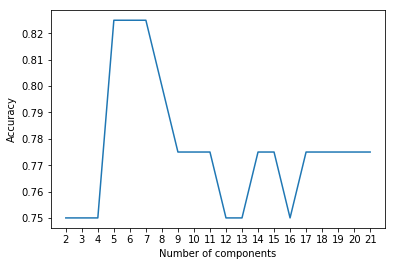

In [12]:
plt.xticks(graph_X)
plt.xlabel("Number of components")
plt.ylabel("Accuracy")
plt.plot(graph_X,graph_Y)
plt.show()

# With K-Fold

In [13]:
import numpy as np

In [17]:
from sklearn.cross_validation import StratifiedKFold

In [18]:
kfold = StratifiedKFold(y=y_train.reshape(155),n_folds=5,random_state=1)

In [19]:
scores = []

In [20]:
logistic_pipe_kfold = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=5)),('clf',LogisticRegression(random_state=1))])

In [21]:
for k, (train, test) in enumerate(kfold):
    logistic_pipe_kfold.fit(X_train[train], y_train[train])
    score = logistic_pipe_kfold.score(X_train[test], y_train[test])
    scores.append(score)

In [22]:
for i,score in enumerate(scores):
    print("%s: %.3f" %(i+1,score))

1: 0.875
2: 0.774
3: 0.935
4: 0.806
5: 0.800


In [23]:
np.mean(scores)

0.83822580645161282

In [24]:
np.std(scores)

0.058961706474499317

# With SVM

In [25]:
from sklearn.grid_search import GridSearchCV

D:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [26]:
from sklearn.svm import SVC

In [27]:
pipe_svc = Pipeline([('scl',StandardScaler()),('clf',SVC(random_state=1))])

In [28]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

In [29]:
param_grid = [{'clf__C':param_range,'clf__kernel':['linear']},{'clf__C':param_range,'clf__gamma':param_range,'clf__kernel':['rbf']}]

In [30]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [31]:
svm_gs = gs.fit(X_train,y_train)

In [32]:
svm_gs.best_score_

0.9354838709677419

In [33]:
svm_gs.best_params_

{'clf__C': 10.0, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}

In [34]:
svm_gs.score(X_test,y_test)

0.94999999999999996

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
y_pred = svm_gs.predict(X_test)

In [37]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [38]:
import seaborn as sns

In [39]:
ax = sns.heatmap(confmat,annot=True)

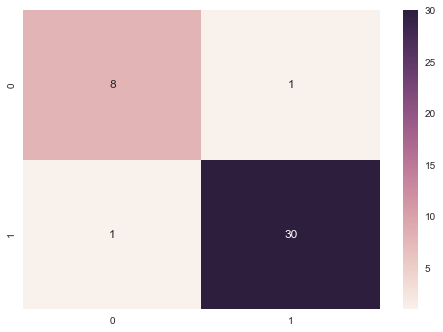

In [40]:
plt.show()

# DecisionTree

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dtree_gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=[{'max_depth': [1,2,3,4,5,6,7,None]}],scoring='accuracy',cv=5,n_jobs=-1)

In [90]:
from sklearn.cross_validation import cross_val_score

In [91]:
scores = cross_val_score(dtree_gs,X_train,y_train,scoring='accuracy',cv=5)

In [93]:
print(scores)

[ 0.78125     0.77419355  0.90322581  0.77419355  0.8       ]


In [94]:
np.mean(scores), np.std(scores)

(0.80657258064516113, 0.049240392820525579)

In [96]:
dtree_gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [97]:
dtree_gs.best_params_

{'max_depth': 3}

In [98]:
dtree_gs.score(X_test,y_test)

0.875

In [99]:
from sklearn.metrics import confusion_matrix

In [100]:
y_pred = dtree_gs.predict(X_test)

In [101]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [102]:
confmat

array([[ 7,  2],
       [ 3, 28]], dtype=int64)

In [103]:
import seaborn as sns

In [104]:
sns.set()

In [108]:
ax = sns.heatmap(confmat, annot=True)

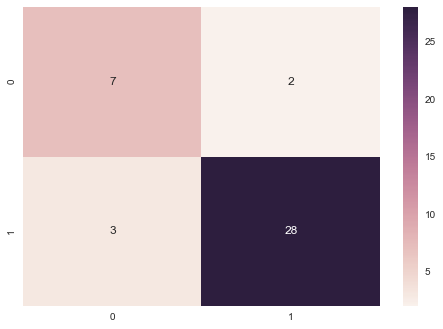

In [110]:
plt.show()

# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
pipe_knn = Pipeline([('scl',StandardScaler()),('clf',KNeighborsClassifier())])

In [50]:
param_grid = [{'clf__n_neighbors':[3,4,5,6,7,8,9,10],'clf__p':[1,2]}]

In [51]:
gs_knn = GridSearchCV(estimator=pipe_knn, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [52]:
gs_knn.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'clf__n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10], 'clf__p': [1, 2]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [53]:
gs_knn.best_params_

{'clf__n_neighbors': 5, 'clf__p': 1}

In [54]:
gs_knn.best_score_

0.9290322580645162

In [55]:
y_pred = gs_knn.predict(X_test)

In [56]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [57]:
ax = sns.heatmap(confmat, annot=True)

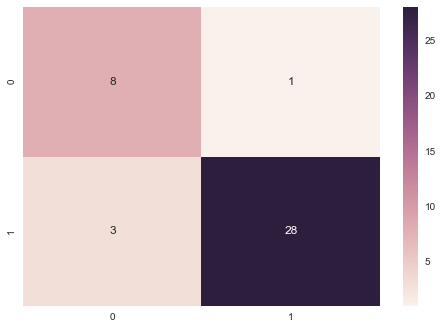

In [58]:
plt.show()

In [59]:
gs_knn.score(X_test,y_test)

0.90000000000000002

# ANN

In [60]:
from keras.models import Sequentialuential

In [61]:
from keras.layers import Dense

In [63]:
model = Sequential()
model.add(Dense(12,input_dim=22,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [64]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                276       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(X_train,y_train, epochs=100, batch_size=10)

Epoch 1/100
155/155 [==============================] - 1s - loss: 1.6368 - acc: 0.6452      
Epoch 2/100
155/155 [==============================] - 0s - loss: 1.0997 - acc: 0.5806     
Epoch 3/100
155/155 [==============================] - 0s - loss: 0.9408 - acc: 0.6645     
Epoch 4/100
155/155 [==============================] - 0s - loss: 0.9113 - acc: 0.6516     
Epoch 5/100
155/155 [==============================] - 0s - loss: 0.8491 - acc: 0.6194     
Epoch 6/100
155/155 [==============================] - 0s - loss: 0.8079 - acc: 0.6452     
Epoch 7/100
155/155 [==============================] - 0s - loss: 0.7608 - acc: 0.6516     
Epoch 8/100
155/155 [==============================] - 0s - loss: 0.7288 - acc: 0.6774     
Epoch 9/100
155/155 [==============================] - 0s - loss: 0.7231 - acc: 0.6323     
Epoch 10/100
155/155 [==============================] - 0s - loss: 0.6749 - acc: 0.7097     
Epoch 11/100
155/155 [==============================] - 0s - loss: 0.6772 - ac

155/155 [==============================] - 0s - loss: 0.4061 - acc: 0.8194     
Epoch 89/100
155/155 [==============================] - 0s - loss: 0.4192 - acc: 0.8065     
Epoch 90/100
155/155 [==============================] - 0s - loss: 0.4003 - acc: 0.8323     
Epoch 91/100
155/155 [==============================] - 0s - loss: 0.4105 - acc: 0.8000     
Epoch 92/100
155/155 [==============================] - 0s - loss: 0.4108 - acc: 0.8258     
Epoch 93/100
155/155 [==============================] - 0s - loss: 0.4138 - acc: 0.8258     
Epoch 94/100
155/155 [==============================] - 0s - loss: 0.4377 - acc: 0.8129     
Epoch 95/100
155/155 [==============================] - 0s - loss: 0.3822 - acc: 0.8387     
Epoch 96/100
155/155 [==============================] - 0s - loss: 0.4039 - acc: 0.8129     
Epoch 97/100
155/155 [==============================] - 0s - loss: 0.4015 - acc: 0.8258     
Epoch 98/100
155/155 [==============================] - 0s - loss: 0.4040 - acc: 0.

In [68]:
scores = model.evaluate(X_test,y_test)

32/40 [=======================>......] - ETA: 0s

In [69]:
scores[1]

0.82499999999999996

In [71]:
y_pred = model.predict(X_test)

In [78]:
y_pred = [round(y[0]) for y in y_pred]

In [80]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [81]:
ax = sns.heatmap(confmat, annot=True)

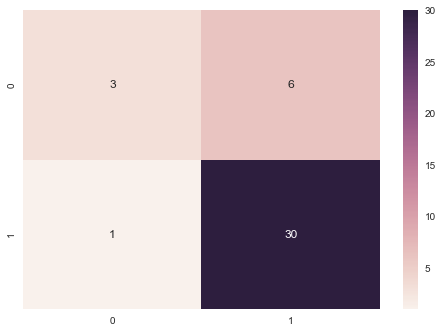

In [82]:
plt.show()